In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import plotting
from pandas.plotting import scatter_matrix
from itertools import cycle
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from random import randint, seed
from sklearn import preprocessing
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

Informacion de Atributos:

- 1) FRESH: annual spending (m.u.) on fresh products (Continuous);
- 2) MILK: annual spending (m.u.) on milk products (Continuous);
- 3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
- 4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
- 5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
- 6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
- 7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
- 8) REGION: customers Region Lisnon, Oporto or Other (Nominal)


### Se hace un analisis de muestreo antes de continuar con todos los datos

In [2]:
#Wholesale customers data, or customers.csv
file_path="Wholesale customers data.csv"
X=pd.read_csv(file_path)
#De pandas a numpy
X_=X.values #Ignora la linea de header! NICE!
print(X.shape)
X.head(5)

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


TRATAR LOS VALORES MISSING

In [3]:
#Como es un valor missing?
X.replace({np.NaN:0}, inplace=True) #???
#Verificar que los valores sean numericos. 
#Regresa las columnas con estos resultados, incluye los NaN
X.columns[X.isna().any()]
#X_.columns


Index([], dtype='object')

Como se puede observar no hay valores missing

### Se muestra la grafica de 2 columnas.
 Para entender como se ven los datos. Por lo visto, se necesita preprocesar los datos

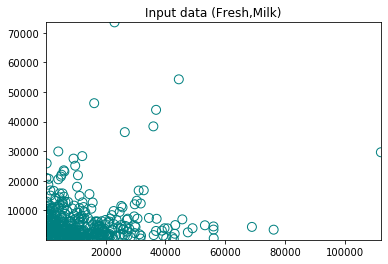

In [4]:
plt.figure()
plt.scatter(X_[:,2], X_[:,3], color='teal', s=80, marker ='o', facecolors = 'none')
x_min, x_max = X_[:,2].min()-1, X_[:,2].max()+1
y_min,y_max= X_[:,3].min()-1, X_[:,3].max()+1
plt.title("Input data (Fresh,Milk)")
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()

# Uso de datos completos

A continuacion se hara un proceso completo de normalizacion, estandarizacion y preprocesamiento de los datos.
Posteriormente se evaluara la cantidad de clusters optimos 


## Normalizacion
Se hace una reduccion de columnas que pueden afectar el procesamiento.

In [5]:
X=pd.read_csv(file_path)
#Primer parte es quitarle las columnas de Region y Channel, ya que son categorias y no valores.
X_drop=X.drop(labels=["Channel","Region"],axis=1)
X_drop.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [6]:
datos_normalizados= preprocessing.Normalizer().fit_transform(X)

Otro metodo es llevar todas las variables a la misma magnitud de distancia, estandarizandolas. No haria falta de remover "Origen" y "Channel"



In [7]:
escalar= StandardScaler()
datos_escalados=escalar.fit_transform(X)
pd.DataFrame(datos_escalados).head()

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


Para la actividad se usaran los __datos normalizados__ y __X_drop__ para el resto de la actividad

## Se muestra una grafica para todas las columnas
para entender como se comportan los datos

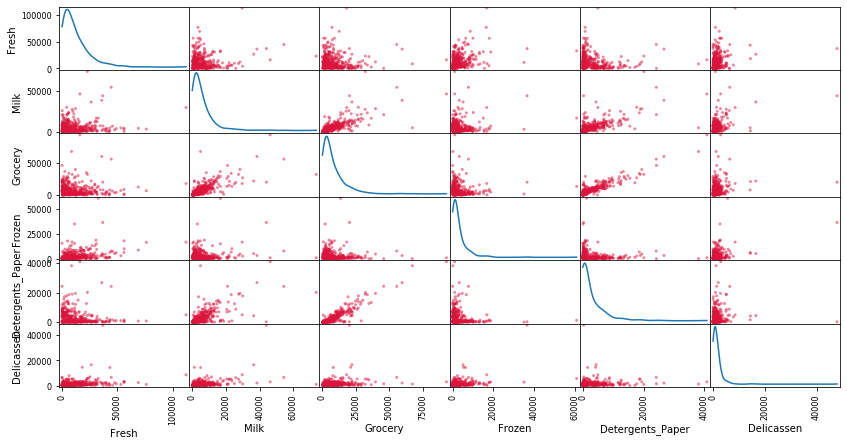

In [8]:
#KDE Kernel Density Estimation or HISTogram plot in the diagonal.
scatter_matrix(X_drop, alpha = 0.5, figsize = (14,7),color="crimson", diagonal = "kde");

## Preprocesamiento de los datos
Las graficas muestran como todos los datos se concentran en la parte inferior izquierda
y lo que influencia en esto son los outliers.
Se realiza una escalacion de propiedades con BoxCox y Logaritmo Natural (ya que no funciona que sea lineal)


In [9]:
#Boxcox
#El boxcox es una transformacion para corregir sesgos, varianzas desiguales o la no linealidad de la relacion
def boxcox_(x):
    boxcox_power_transformed_array,maxlog_=stats.boxcox(x)
    return boxcox_power_transformed_array

BOXCOX


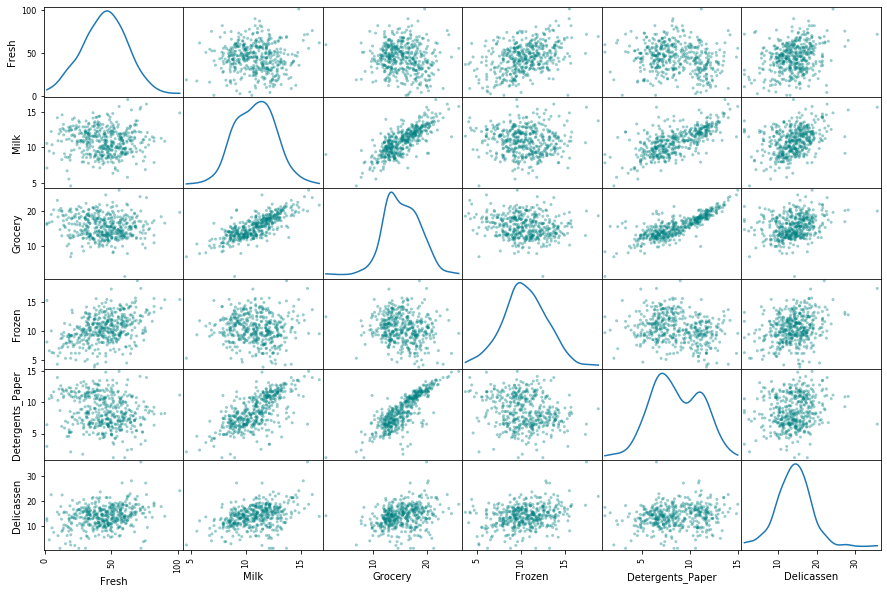

In [10]:
datos_boxcox=X_drop.apply(boxcox_,axis=0)
print("BOXCOX")
#To remove the array texts, you can put a ";" at the end of the code[1]
scatter_matrix(datos_boxcox, alpha = 0.4, figsize = (15,10),color="teal", diagonal = 'kde');

Logaritmo Natural


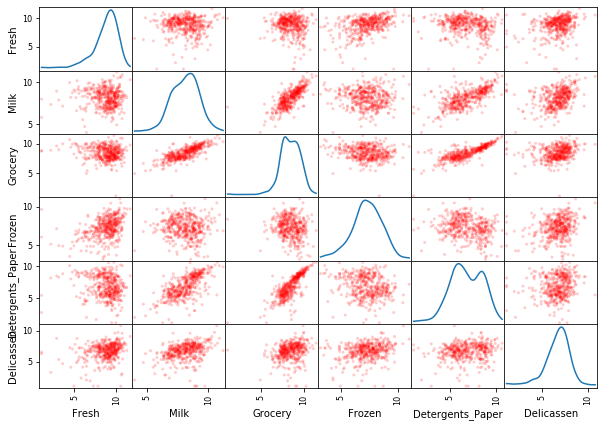

In [11]:
datos_natlog= X_drop.apply(np.log)
print("Logaritmo Natural")
scatter_matrix(datos_natlog,alpha=0.2,figsize=(10,7),color="red",diagonal="kde");

Se puede apreciar que el BoxCox mantiene los datos mas centrados, que sin haber sido preprocesados, o que el logaritmo natural

## Elegir modelo de algoritmo de clustering
Se considera el Modelo Mixto Gausiano y KMeans.

__Gaussian Mixture Model(MMC)__ Funciona mejor en modelos no circulares. cada punto pertenece a multiples clusters.

__KMeans__ : usa distancia Euclideana, clasifica los puntos en clusters y actualiza iterativamente centrando el cluster. Este se puede considerar como una version simplificada de MMC [2]
Teniendo en cuenta que MMC es mas costoso computacionalmente, se elige Kmeans

## Determinar el numero de clusters
Se va a medir el atributo INERCIA (inertia) de distinto numero de clusters, para determinar cual presenta un numero  optimo

In [12]:
tots_clust=15
lista_inercia_cluster=[] #basado en Suma de Errores Cuadraticos SSE
for no_cluster in range(1,tots_clust):
    kmeans = KMeans(n_jobs=-1,n_clusters=no_cluster,init='k-means++') #k-means++ produce mejor resultados 
    kmeans.fit(datos_normalizados) #datos escalados
    lista_inercia_cluster.append(kmeans.inertia_)
    

Text(0.5, 0, 'Numero de clusters')

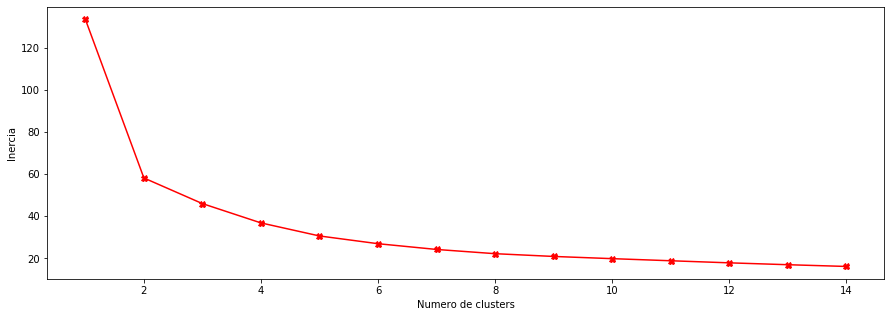

In [13]:
df=pd.DataFrame({"cantidad":range(1,tots_clust),"LIC":lista_inercia_cluster})
plt.figure(figsize=(15,5))
plt.plot(df['cantidad'],df['LIC'],marker='X',color="red")
plt.ylabel('Inercia')
plt.xlabel("Numero de clusters")

In [14]:
## sacar los outliers #Removerlos del dataset
## hacer un PCA con datos reducidos

In [15]:
modelo_pca=PCA(n_components=2)
modelo_pca.fit(datos_normalizados)
datos_pca=modelo_pca.transform(datos_normalizados)
datos_pca=pd.DataFrame(datos_normalizados)

In [16]:
puntaje = {}
puntaje_maximo=0
mejor_cluster=0

#Minimo se necesita usar 2 clusters.
for no_c in range(10, 1, -1):
    k_er = KMeans(n_clusters=no_c, random_state=0).fit(datos_pca)
    preds = k_er.predict(datos_pca)
    centros = k_er.cluster_centers_
    no_puntaje = silhouette_score(datos_pca, preds, metric='euclidean')
    print ('Puntaje para',no_c,"clusters:", no_puntaje)
    puntaje[no_c] = silhouette_score(datos_pca, preds, metric='euclidean')
    if(no_puntaje>puntaje_maximo):
        puntaje_maximo=no_puntaje
        mejor_cluster=no_c
print ('---\nEl puntaje maximo de Silhouette_score es',puntaje_maximo,'con clusters',mejor_cluster)

Puntaje para 10 clusters: 0.31566728344208583
Puntaje para 9 clusters: 0.30810380572668133
Puntaje para 8 clusters: 0.3319078172274779
Puntaje para 7 clusters: 0.33597979292870417
Puntaje para 6 clusters: 0.36466204472980324
Puntaje para 5 clusters: 0.3751662259025521
Puntaje para 4 clusters: 0.3916603082929343
Puntaje para 3 clusters: 0.4490241274990781
Puntaje para 2 clusters: 0.5002245229760047
---
El puntaje maximo de Silhouette_score es 0.5002245229760047 con clusters 2


- Usando los datos_escalados:
Se logra apreciar muy sutilmente que entre 6 y 7 hay poco cambio, antes que vuelva a incrementarse la inercia.
Entonces, se puede elegir 6 u 8, ya que 7 es ponerle mas carga a un resultado casi similar a 6.

- Usando los datos normalizados:
se nota que hay cambio minusculo a partir de 6. Usaremos 6 clusters

In [17]:
no_clusters=6

# Crear un modelo de Principal Component Analysis (PCA)

In [18]:
#Cargarlas y procesarlas de nuevo, genera un output distinto, se altero en un punto previo
X=pd.read_csv(file_path)
X_drop=X.drop(labels=["Channel","Region"],axis=1)
datos_normalizados= preprocessing.Normalizer().fit_transform(X_drop)

print("shape:",datos_normalizados.shape)

shape: (440, 6)


In [19]:
kmeans=KMeans(n_clusters=no_clusters)#ALtera los datos del for!
kmeans.fit(datos_normalizados)
centroids, labels= kmeans.cluster_centers_, kmeans.labels_

#Reducir dimensiones a 2, transformando propiedades.
#usar el Principal Component Analysis
modelo_pca=PCA(n_components=2)
modelo_pca.fit(datos_normalizados)

datos_normalizados=modelo_pca.transform(datos_normalizados)
centroides_pca=modelo_pca.transform(centroids)#Transformar los centroides tambien


### Grafico 2D
HAcer un grafico, mostrando los datos normalizados, 

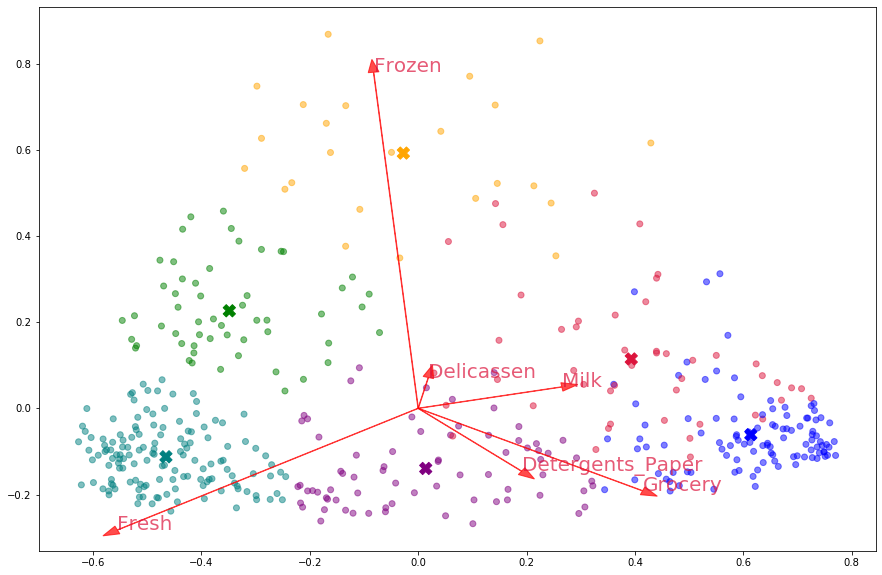

In [20]:
#colores del plot
colores=['teal','blue','crimson','orange','green',"purple"]
features_with_colors=[colores[labels[i]] for i in range(len(datos_normalizados))]
plt.rcParams['figure.figsize']=(15,10)

#hacer plot los componentes de pca
plt.scatter(datos_normalizados[:,0],datos_normalizados[:,1], c=features_with_colors ,marker="o",alpha=0.5)
#hacer plot de los centroides
plt.scatter(centroides_pca[:,0],centroides_pca[:,1],marker="X",linewidths=1,c=colores,s=150)

#Hacer un señalamiento de atributos
vecX=modelo_pca.components_[0]*max(datos_normalizados[:,0])
vecY=modelo_pca.components_[1]*max(datos_normalizados[:,1])
cols=X_drop.columns

for i in range(len(cols)):
    plt.arrow(0,
              0,
              vecX[i],
              vecY[i], 
              color='red',
              width=0.001,
              head_width=0.02,
              alpha=0.7)
    plt.text(vecX[i],
             vecY[i],
             list(cols)[i],
             fontsize=20,
             color='crimson',
             alpha=0.7)
    
plt.show()
print()

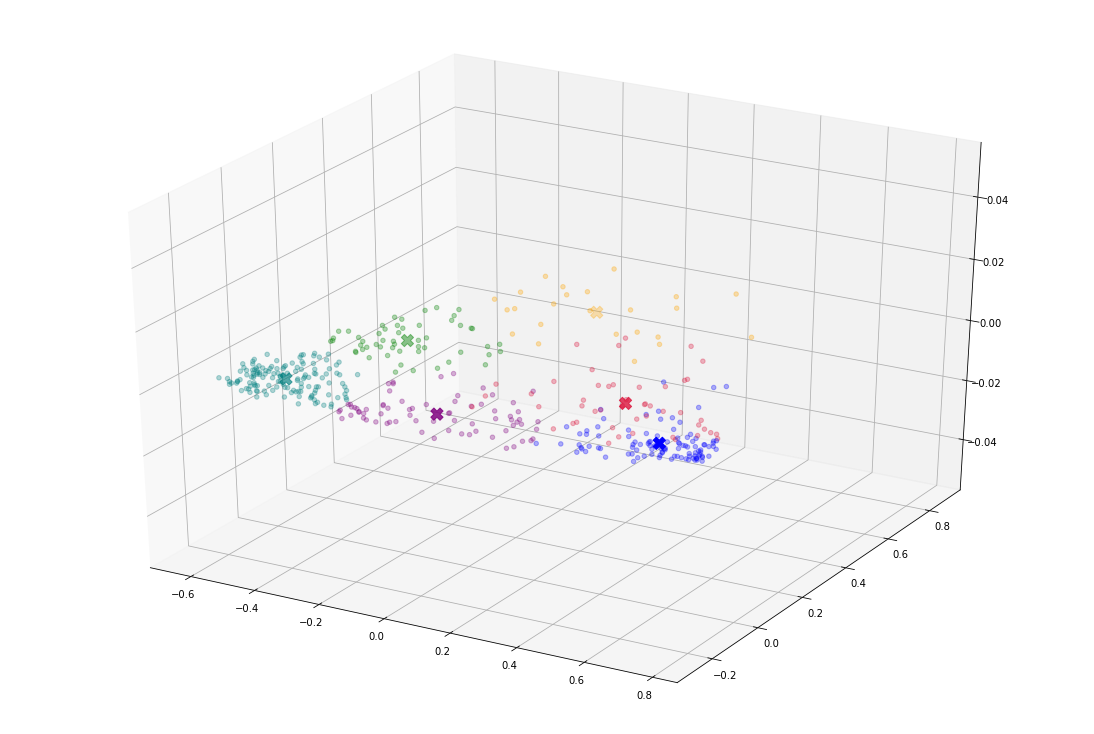

In [21]:
plt.rcParams['figure.figsize']=(15,10)
X_,y_ = make_blobs(n_samples=800,n_features=6,centers=8)
fig=plt.figure()
ax=Axes3D(fig)
#hacer plot los componentes de pca
ax.scatter(datos_normalizados[:,0],datos_normalizados[:,1], c=features_with_colors ,marker="o",alpha=0.3)
#hacer plot de los centroides
ax.scatter(centroides_pca[:,0],centroides_pca[:,1],marker="X",linewidths=1,c=colores,s=150)

## Estimar el Bandwidth y Usar Meanshift
BANDWIDTH es un parametro delimitador del proceso de la estimacion de densidad en el MSA.
Primero se estima el bandwidth con los datos normalizados,
Se hace un modelo de meanshift y se ajusta con los datos iniciales
Se obtiene el numero de clusters y se extrae el centro de estos


In [22]:
X=pd.read_csv(file_path)
X_drop=X.drop(labels=["Channel","Region"],axis=1)
X_=X.values #Ignora la primer linea del header! NICE!
X_drop_=X_drop.values #Ignora la primer linea del header! NICE!
datos_normalizados= preprocessing.Normalizer().fit_transform(X_drop)
X_norm_=datos_normalizados


NUmero de clusters en los datos de modelo meanshift: 12


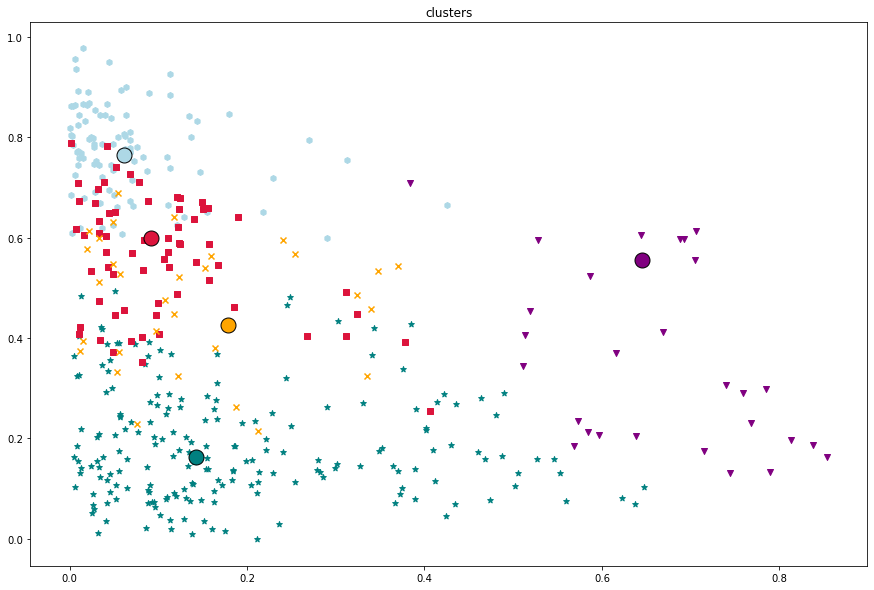

In [24]:
bandwidth_X= estimate_bandwidth(datos_normalizados, quantile=0.1, n_samples=len(X_norm_))
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X_norm_)
cluster_centers= meanshift_model.cluster_centers_

#obtener el numero de clusters a traves de labels
labels= meanshift_model.labels_
num_clusters= len(np.unique(labels))#, longitud de valores unicos en labels, dentro de meanshift_model
print("\nNUmero de clusters en los datos de modelo meanshift:", num_clusters)
plt.figure()

colores=['teal','lightblue','crimson','orange',"purple","green"]
markers = '*hsxv' #string de tipos de marcadores, o, *, X, S, V,h
for i, marker in  zip(range(num_clusters),markers): #un numero (de unicos) y un tono de markes, el zip lo transforma en coordenadas que regresa a dos variables, marker y i
    plt.scatter(X_norm_[labels==i,3], X_norm_[labels==i, 2], marker=marker,color=colores[i%5])
    cluster_center =  cluster_centers[i]
    plt.plot(cluster_center[3], cluster_center[2], marker='o', markerfacecolor=colores[i%5], markeredgecolor='black', markersize=15)
    
plt.title("clusters")
plt.show()
    



# Conclusiones
Se mostraron varios _approaches_ en la actividad, que muestran variantes del resultado. Algunas necesitan mas trabajo que otras.

De lo mostrado se puede resumir como: Obtener los datos, remover los campos que solo alteran el proceso de datos, normalizando los datos.
Posteriormente se busca un punto optimo de clusters, se realiza una grafica y un for loop.
Se muestran todas los campos y se intenta centrar los valores con un logaritmo natural, y un boxcox
se procesa con KMEANS (se explica el GMM)  y se grafica en 2d y 3d.

Alguno de los approaches mecnionados son Meanshift, datos escalados y modelo Gaussiano
    

## Referencias
[1] https://stackoverflow.com/questions/44102532/problems-importing-pandas-plotting/

[2] Clustering, KMeans y GMM https://byrony.github.io/customer-segmentation-customer-types-analysis-for-a-wholesale-distributor.html

[] https://www.informaticaparatunegocio.com/blog/normalizar-datos-algunas-veces-se-desnormalizan/

[] https://es.wikipedia.org/wiki/Transformaci%C3%B3n_Box-Cox

[] PRATEEK JOSHI, Artificial Intelligence with Python. Packt (2017)